In [134]:
# 라이브러리 임포트

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
# 예제 데이터 준비하기(농어 길이로 무게 예측하기)

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     ) # 농어의 길이
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     ) # 농어의 무게

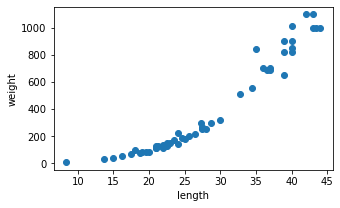

In [3]:
# 데이터 시각화

plt.figure(figsize = (5,3))
plt.scatter(perch_length, perch_weight)

plt.xlabel('length')
plt.ylabel('weight')

plt.show() # 2차 함수 모양으로 분포해있다.

### 설명변수(X) 데이터는 2차원(관측치 * 특성)으로 나타내야 함

In [4]:
# reshape 메서드: array 배열 구조 바꾸기 ** '-1'로 설정하면 나머지 원소 개수로 자동으로 채워짐

perch_length = perch_length.reshape(-1,1) # length = 56이니 -1 (= 56) * 1

In [5]:
# 데이터 분할 (train:test = 8:2)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(perch_length, perch_weight,
                                                    random_state = 42)

In [6]:
from sklearn.neighbors import KNeighborsRegressor

In [7]:
KNR = KNeighborsRegressor()

In [8]:
KNR.fit(X_train, y_train)

print('R squre is {}'.format(round(KNR.score(X_test, y_test), 4)))
# 분류 문제에서 score == accuracy, 회귀 문제에서 score == R squre

R squre is 0.9928


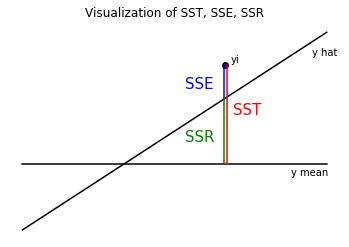

In [9]:
plt.plot([1,2,3,4],[1,2,3,4], color = 'black')
plt.plot([1,2,3,4],[2,2,2,2], color = 'black')
plt.plot([3.02,3.02],[2,3.5], color = 'red')
plt.plot([2.99,2.99],[3,3.5], color = 'blue')
plt.plot([2.99,2.99],[2,3], color = 'green')
plt.text(3.05,3.55,'yi')
plt.text(3.85,3.65,'y hat')
plt.text(3.65,1.83,'y mean')
plt.text(3.08,2.75,'SST', color = 'red', size = 15)
plt.text(2.6,3.15,'SSE', color = 'blue', size = 15)
plt.text(2.6,2.35,'SSR', color = 'green', size = 15)

plt.scatter(3,3.5, color = 'black')
plt.axis('off')
plt.title('Visualization of SST, SSE, SSR')
plt.show()

## MAE(mean absolute error)
- mae는 모델 성능을 직관적으로 확인할 수 있다.
- 예) mae = N → '(타겟과) 평균적으로 N 정도 다르다.'라고 해석 가능

In [10]:
from sklearn.metrics import mean_absolute_error

predict = KNR.predict(X_test)
mean_absolute_error(y_test, predict)

19.157142857142862

## 과대적합, 과소적합

- 훈련 세트를 가지고 훈련을 시킨 것이므로 테스트 세트보다 훈련 세트의 성능이 떨어지는 것은 이상한 현상  
 → 과소적합
       
- 반대로, 훈련 세트에 비해 터무니없이 낮은 테스트 세트 성능  
 → 과대적합  
#### → 과하게 데이터 전반의 특성을 반영하면 과소적합, 과하게 데이터 국지적 특성을 반영하면 과대적합 위험이 있음


- KNN은 이웃의 개수 k를 줄이면 모델을 더 복잡하게 만들 수 있다.(데이터 전체보단 부분의 특성을 반영하므로)  
- 반대로 k 개수를 늘리면 더 데이터 전반의 일반적인 패턴 따르므로 과대적합 문제 해결  

In [11]:
print('훈련 세트의 R squre: {}'.format(KNR.score(X_train,y_train)))
print('테스트 세트의 R squre: {}'.format(KNR.score(X_test,y_test)))

# 과소적합이라고 추정할 수 있다.

훈련 세트의 R squre: 0.9698823289099254
테스트 세트의 R squre: 0.992809406101064


In [12]:
KNR.n_neighbors = 3
KNR.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [13]:
print('훈련 세트의 R squre: {}'.format(KNR.score(X_train,y_train)))
print('테스트 세트의 R squre: {}'.format(KNR.score(X_test,y_test)))

# 과소적합 문제가 해결됐다고 볼 수 있다.

훈련 세트의 R squre: 0.9804899950518966
테스트 세트의 R squre: 0.9746459963987609


## 사례기반학습, 모델기반학습

모델기반학습 : 알고리즘 훈련 과정이 최적의 모델 파라미터를 찾는 것  
사례기반학습 : 훈련 세트를 저장하여 이를 기반으로 학습

KNN = 사례기반학습  
선형회귀 = 모델기반학습 
  
사례기반학습의 한계  
- KNN같은 사례기반학습은 가지고 있는 데이터 사례와 동떨어진 데이터가 들어오면 옳지 않은 결과를 낼 위험성이 있음    
- 예를 들어 새로운 데이터로 'x = 50'(혹은 그 이상)이 들어와도, 가장 근접 세 이웃이 x = [40,44,45], y = [1000,1200,1100]라면 y값을 평균인 1100으로 예측해버림  

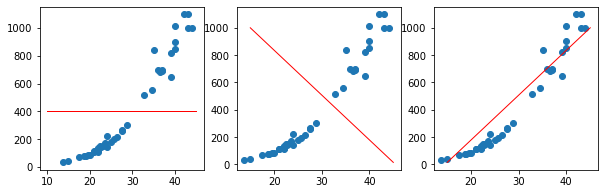

In [14]:
plt.figure(figsize = (10,3))

plt.subplot(131)
plt.scatter(X_train, y_train)
plt.plot([10,45],[y_train.mean(),y_train.mean()], color = 'red', linewidth = 1)

plt.subplot(132)
plt.scatter(X_train, y_train)
plt.plot([15,45],[1000,15], color = 'red', linewidth = 1)

plt.subplot(133)
plt.scatter(X_train, y_train)
plt.plot([15,45],[15,1000], color = 'red', linewidth = 1)

plt.show()

## 선형회귀
- 데이터의 특성을 잘 나타내는 직선을 학습하는 알고리즘

1번 그래프: 직선의 위치가 훈련세트의 평균 → R squre = 0 (SSR 안의 (y hat - y mean) = 0이 되어버리니)  
2번 그래프: 직선의 위치가 완전히 반대 → 평균보다 못한 예측으로 R squre < 0  
3번 그래프: 이러한 직선을 찾아야 한다!


In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
lr.predict([[50]]) # 원래의 범위를 벗어난 관측치도 예측 가능

array([1241.83860323])

In [17]:
# 파라미터 확인
print(lr.coef_, lr.intercept_)

# 모델이 y = 39.01714496 * X -709.0186449535477의 직선이라는 것을 알 수 있다.

[39.01714496] -709.0186449535477


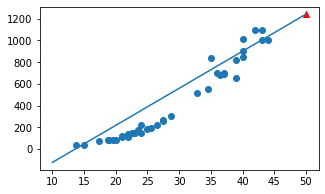

In [26]:
# 선형회귀 시각화

plt.figure(figsize = (5,3))

# 훈련세트 산점도
plt.scatter(X_train, y_train)
# 직선 그리기
plt.plot([10,50], [lr.coef_*15+lr.intercept_, lr.coef_*50+lr.intercept_])
# 새로운 예측값
plt.scatter(50,lr.coef_*50+lr.intercept_, marker = '^', color = 'red')

plt.show()

In [19]:
# 선형회귀의 R squre

print('훈련 세트의 R squre: {}'.format(lr.score(X_train,y_train)))
print('테스트 세트의 R squre: {}'.format(lr.score(X_test,y_test)))

훈련 세트의 R squre: 0.939846333997604
테스트 세트의 R squre: 0.8247503123313558


## 다항회귀

- 현재 사용하는 예제 데이터는 직선보다는 곡선의 형태를 띔
- ★ 2차 함수의 그래프를 그리려면 훈련 세트에 제곱항 추가!!

In [20]:
X_train_2 = np.column_stack((X_train**2, X_train))
X_test_2 = np.column_stack((X_test**2, X_test))

In [21]:
lr2 = LinearRegression()
lr2.fit(X_train_2, y_train)

LinearRegression()

In [23]:
lr2.predict([[50**2,50]]) # 다항회귀에도 새로운 변수 추가해보기

array([1573.98423528])

In [25]:
# 파라미터 확인
print(lr2.coef_, lr2.intercept_)

# 모델이 y = 1.01433211 * X^2 - 21.55792498 * X + 116.05021078278259의 직선이라는 것을 알 수 있다.

[  1.01433211 -21.55792498] 116.05021078278259


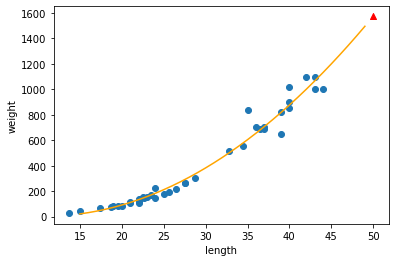

In [36]:
# 다항회귀 시각화

plt.scatter(X_train, y_train)

x = np.arange(15,50)
plt.plot(x, 1.01433211 * x**2 - 21.55792498 * x + 116.05021078278259, color = 'orange')

plt.scatter(50, lr2.predict([[50**2,50]]), marker = '^', color = 'red')
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [37]:
# 다항회귀의 R squre

print('훈련 세트의 R squre: {}'.format(lr2.score(X_train_2,y_train)))
print('테스트 세트의 R squre: {}'.format(lr2.score(X_test_2,y_test)))

훈련 세트의 R squre: 0.9706807451768623
테스트 세트의 R squre: 0.9775935108325121


## 다중회귀
- 선형회귀와 다르게 다양한 특성(X)를 사용하는 회귀분석
- 특성 공학(feature engineering): (특성 * 특성). 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업

In [52]:
# 예제 데이터 불러오기

df = pd.read_csv('https://bit.ly/perch_csv_data')
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [123]:
X_train, X_test, y_train, y_test = train_test_split(df, perch_weight, random_state = 42)

## PolynomialFeatures
- 각 특성을 제곱한 항 추가 + 특성끼리 서로 곱한 항 추가
- 특성 공학에 유용

In [108]:
from sklearn.preprocessing import PolynomialFeatures

In [109]:
# example

poly = PolynomialFeatures()
poly.fit_transform([[2,3]]) # [1*1, 2*1, 3*1, 2*2, 2*3, 3*3]

array([[1., 2., 3., 4., 6., 9.]])

In [120]:
poly = PolynomialFeatures(include_bias = False) # include_bias = False → 절편(1*1)를 제외함
poly.fit(X_train)

X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

print(X_train_poly.shape, X_test_poly.shape)

(42, 9) (14, 9)


In [122]:
# 어떤 조합으로 만들어졌는지 확인

poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [119]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_poly, y_train)

# 다중회귀의 R squre

print('훈련 세트의 R squre: {}'.format(lr.score(X_train_poly,y_train)))
print('테스트 세트의 R squre: {}'.format(lr.score(X_test_poly,y_test)))

훈련 세트의 R squre: 0.9999999999938143
테스트 세트의 R squre: -144.40744532797535


## 규제 (Ridge, Lasso)
규제: 훈련세트를 과도하게 학습하지 못하도록 규제하는 것 (과적합 방지)  

선형회귀모델에 규제를 추가한 모델 릿지 & 라쏘
- 릿지: 계수를 제곱한 값을 기준으로 규제 적용
- 라쏘: 계수의 절댓값을 기준으로 규제 적용. 계수를 0으로 만들 수 있어 변수 선택법으로 쓸 수도 있음 
- 일반적으로 릿지 선호

In [113]:
# 규제를 위한 데이터 만들기 → PolynomialFeatures를 이용하여 3,4제곱까지 추가

poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

# 만든 데이터를 가지고 선형회귀
lr.fit(X_train_poly, y_train)

print('훈련 세트의 R squre: {}'.format(lr.score(X_train_poly,y_train)))
print('테스트 세트의 R squre: {}'.format(lr.score(X_test_poly,y_test))) # 매우매우 과적합 → 규제를 사용해보자

훈련 세트의 R squre: 0.9999999999938143
테스트 세트의 R squre: -144.40744532797535


### 릿지 회귀

- 선형회귀에서 규제를 적용할 때는 계수값의 차이가 크면 공정하게 제어X
- 정규화를 통해 스케일 맞춰주자 (라쏘도 마찬가지)
- alpha값(hyper parameter)으로 규제 강도 조절 가능(alpha값이 크면 규제 강도 세짐 → 과소적합 위험/alpha값이 작으면 반대)

In [114]:
# 정규화

from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS.fit(X_train_poly)

X_train_scaled = SS.transform(X_train_poly)
X_test_scaled = SS.transform(X_test_poly)

In [115]:
# 릿지회귀

from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)

# 릿지회귀 R squre

print('훈련 세트의 R squre: {}'.format(ridge.score(X_train_scaled,y_train)))
print('테스트 세트의 R squre: {}'.format(ridge.score(X_test_scaled,y_test))) # 확실히 완화되었다.

훈련 세트의 R squre: 0.9896101671037343
테스트 세트의 R squre: 0.979069397761539


In [116]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train_scaled, y_train)
    
    train_score.append(ridge.score(X_train_scaled,y_train))
    test_score.append(ridge.score(X_test_scaled, y_test))

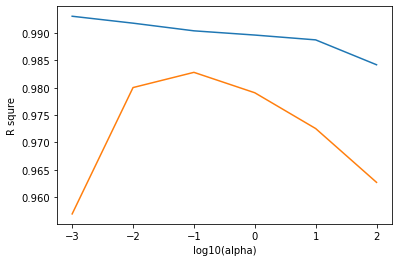

In [126]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

plt.xlabel('log10(alpha)')
plt.ylabel('R squre')
plt.show()

In [127]:
# 가장 차이가 적은 alpha값 최종 하이퍼파라미터로 사용

ridge = Ridge(alpha = 0.1)
ridge.fit(X_train_scaled, y_train)

# 릿지회귀 R squre

print('훈련 세트의 R squre: {}'.format(ridge.score(X_train_scaled,y_train)))
print('테스트 세트의 R squre: {}'.format(ridge.score(X_test_scaled,y_test))) # 확실히 완화되었다.

훈련 세트의 R squre: 0.9903815817570369
테스트 세트의 R squre: 0.9827976465386932


## 라쏘회귀
- 릿지회귀 과정과 매우 유사

In [128]:
# 라쏘회귀

from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

# 라쏘회귀 R squre

print('훈련 세트의 R squre: {}'.format(lasso.score(X_train_scaled,y_train)))
print('테스트 세트의 R squre: {}'.format(lasso.score(X_test_scaled,y_test))) # 확실히 완화되었다.

훈련 세트의 R squre: 0.989789897208096
테스트 세트의 R squre: 0.9800593698421884


In [135]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha = alpha, max_iter = 10000) # max_iter = 10000 → 라쏘는 반복계산을 수행하는데, 횟수가 부족하면 경고문 발생
    lasso.fit(X_train_scaled, y_train)
    
    train_score.append(lasso.score(X_train_scaled,y_train))
    test_score.append(lasso.score(X_test_scaled, y_test))

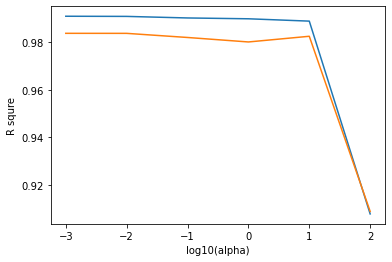

In [137]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

plt.xlabel('log10(alpha)')
plt.ylabel('R squre')
plt.show()

In [138]:
# 가장 차이가 적은 alpha값 최종 하이퍼파라미터로 사용

lasso = Lasso(alpha = 10)
lasso.fit(X_train_scaled, y_train)

# 릿지회귀 R squre

print('훈련 세트의 R squre: {}'.format(lasso.score(X_train_scaled,y_train)))
print('테스트 세트의 R squre: {}'.format(lasso.score(X_test_scaled,y_test))) # 확실히 완화되었다.

훈련 세트의 R squre: 0.9888067471131867
테스트 세트의 R squre: 0.9824470598706695


In [142]:
# 라쏘회귀가 0으로 만든 계수의 개수

(lasso.coef_ == 0).sum() # 40개가 0이 되었다.(= 40개는 불필요한 변수였다.)

40